# Addition with Quantum
By Kreecha and Anders
16/02/2021

Objective:

- Learn Quantum Computing (QC) with simple addition of ages between husband and wife

In summary what we did:

* Some research to pick a QC library. Picked QisKit, which is one of number of QC libraries recommend [here](https://medium.com/the-research-nest/top-frameworks-to-explore-quantum-computing-2485c678a15a).
* Implemented a solution

In summary what we observed:

* Learning to do simple algorithmic with quantum computing is still orders of magnitude harder than using any classical computer programming language (including Python) on a classical computer

In [11]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer

I am 50 and my girl friend is 44, turn into binary strings

In [2]:
my_age_bin = "{0:b}".format(50)
my_gf_age_bin = "{0:b}".format(44)
print(f"my age in binary= {my_age_bin} and girlfriend age in binary= {my_gf_age_bin}")

my age in binary= 110010 and girlfriend age in binary= 101100


In [3]:
husband =  my_age_bin
wife = my_gf_age_bin

l_husband = len(husband)     # length of ages binary
l_wife = len(wife)           # length of wife binary

n = max(l_husband, l_wife)   # longest binary string length

### Define the Quantum and Classical Registers and Build the circuit

Initialising two quantum registers with n bits (6) the extra (n+1) will also hold the sum of the two numbers

The classical register is the output the final sum.

In [4]:
first_num = QuantumRegister(n)            # First number
second_num = QuantumRegister(n+1)         # Second number and sum

carry_bits = QuantumRegister(n)           # Carry bits

cl = ClassicalRegister(n+1)               # Final output

# make all of them into one quantum circuit
qc = QuantumCircuit(first_num, second_num, carry_bits, cl)

# Set up the registers to hold the values 
counter = 0
for i in husband:
    if i == "1":
        qc.x(first_num[l_husband - (counter+1)])
    counter += 1

counter = 0
for i in wife:
    if i == "1":
        qc.x(second_num[l_wife - (counter+1)])
    counter += 1


The circuit contains 3 inputs: first_num, second_num, and carry_bits

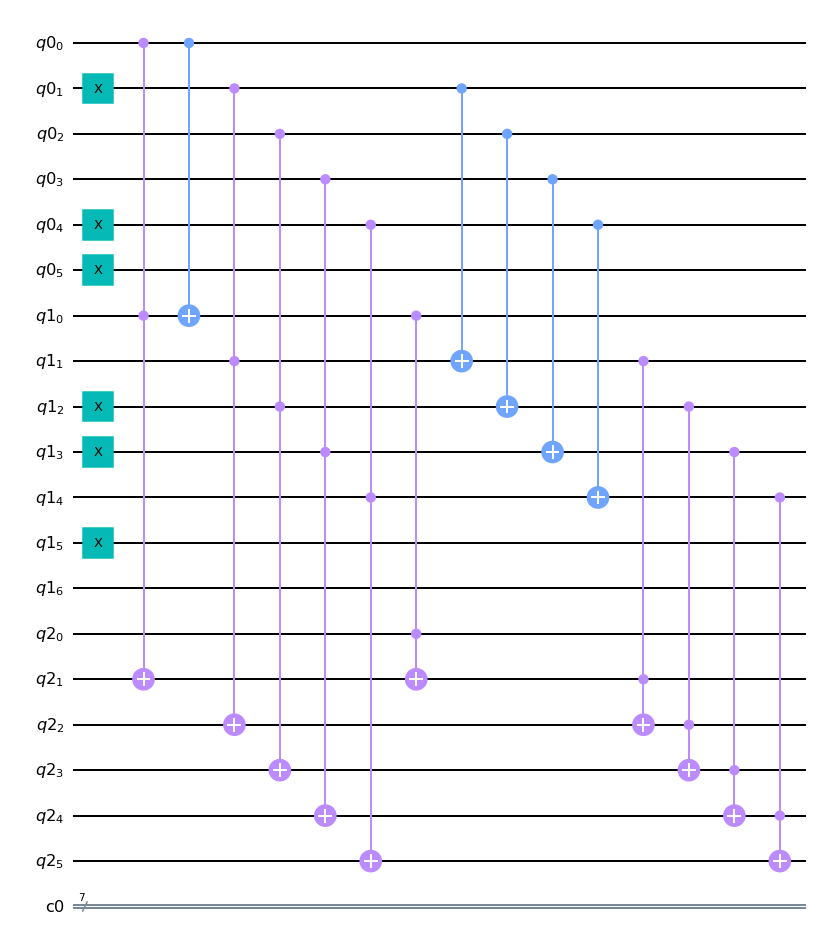

In [5]:
for i in range(n-1):
    qc.ccx(first_num[i], second_num[i], carry_bits[i+1])
    qc.cx(first_num[i], second_num[i])
    qc.ccx(carry_bits[i], second_num[i], carry_bits[i+1])

qc.draw(output='mpl')  

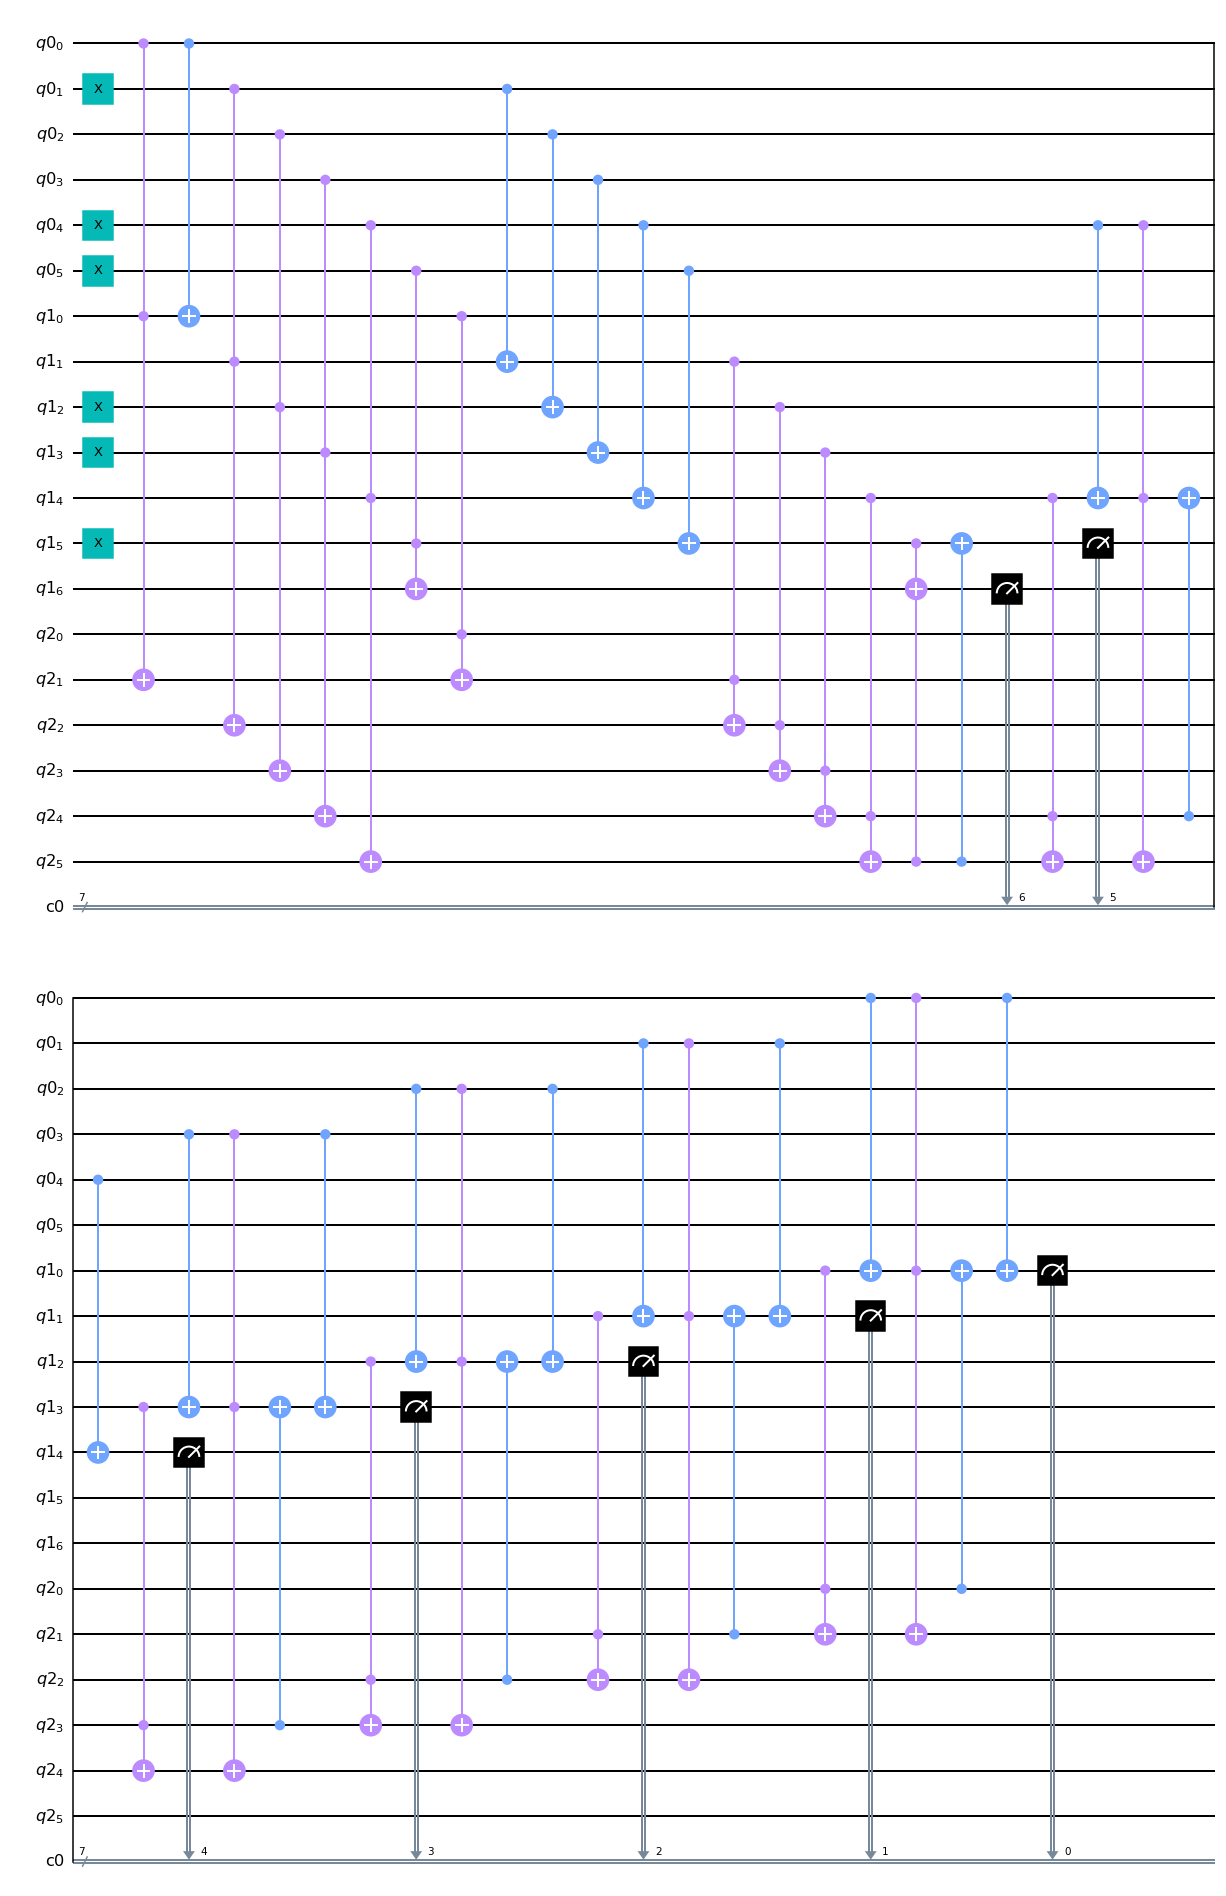

In [6]:
qc.ccx(first_num[n-1], second_num[n-1], second_num[n])
qc.cx(first_num[n-1], second_num[n-1])
qc.ccx(carry_bits[n-1], second_num[n-1], second_num[n])

# reverse the gate operation.
qc.cx(carry_bits[n-1], second_num[n-1])

# reverse the gate performed during carry gate.
for i in range(n-1):
    qc.ccx(carry_bits[(n-2)-i], second_num[(n-2)-i], carry_bits[(n-1)-i])
    qc.cx(first_num[(n-2)-i], second_num[(n-2)-i])
    qc.ccx(first_num[(n-2)-i], second_num[(n-2)-i], carry_bits[(n-1)-i])
    
    # two operations is a sum gate.
    qc.cx(carry_bits[(n-2)-i], second_num[(n-2)-i])
    qc.cx(first_num[(n-2)-i], second_num[(n-2)-i])

# Measure qubits
for i in range(n+1):
    qc.measure(second_num[i], cl[i])

qc.draw(output='mpl')

## Set backend and execute job

In [7]:
num_shots = 100 # times to repeat measurement
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=num_shots)

# Get results of program   
result = job.result()

In [8]:
#plot the results
measurement_result = result.get_counts(qc)
print(measurement_result)

{'1011110': 100}


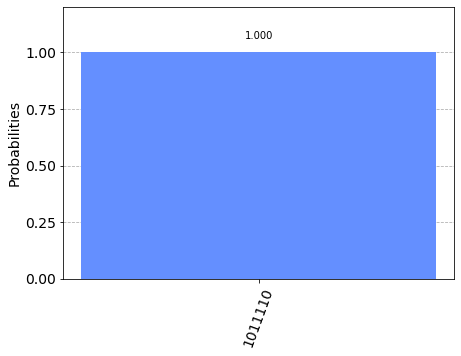

In [9]:
plot_histogram(measurement_result)

In [10]:
summary = int(list(measurement_result.keys())[0], 2)
print(summary)

94


So 94 which is the correct answer. As you can see to do an addition it requires us to do these many steps.